<a href="https://colab.research.google.com/github/GabCopetti/Chest-X-Rays-Binary-Classification/blob/main/Chest_X_Rays_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Installing datasets
!pip install datasets

#Downloading the chest-xray-classification dataset in full, with train, validation and test splits.
import datasets
from datasets import load_dataset
train_dataset = load_dataset("keremberke/chest-xray-classification", "full", split="train")
valid_dataset = load_dataset("keremberke/chest-xray-classification", "full", split="validation")
test_dataset  = load_dataset("keremberke/chest-xray-classification", "full", split="test")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
      S

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/4077 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1165 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/582 [00:00<?, ? examples/s]

In [2]:
#Having a look at the shape of each subset
train_dataset.shape, valid_dataset.shape, test_dataset.shape

((4077, 3), (1165, 3), (582, 3))

In [3]:
#Sample
train_dataset[0]

{'image_file_path': '/storage/hf-datasets-cache/all/datasets/60340657865253-config-parquet-and-info-keremberke-chest-xray-cla-9d66ea8b/downloads/extracted/8202f7dd6f1edf5e674abe75990eb233fbbca4408e132a3acd5268bd99708e15/NORMAL/IM-0003-0001_jpeg.rf.3fffcf9c33575f8f928b017484f99a64.jpg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x640>,
 'labels': 0}

***
Train, validation and test datasets have 4077, 1165 and 582 entries, respectively. The dataset is composed of a list of dictionaries, with 3 keys: image_file_path, image, and labels.
***

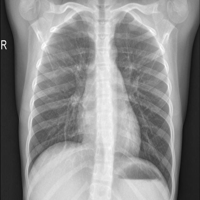

In [4]:
#Image from sample
train_dataset[0]['image'].resize((200,200))

In [5]:
import pandas as pd

#Converting train dataset to pandas dataframe
df_train = train_dataset.to_pandas()
df_train

,image_file_path,image,labels
0,/storage/hf-datasets-cache/all/datasets/603406...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0
1,/storage/hf-datasets-cache/all/datasets/603406...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0
2,/storage/hf-datasets-cache/all/datasets/603406...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0
3,/storage/hf-datasets-cache/all/datasets/603406...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0
4,/storage/hf-datasets-cache/all/datasets/603406...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0
...,...,...,...
4072,/storage/hf-datasets-cache/all/datasets/603406...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,1
4073,/storage/hf-datasets-cache/all/datasets/603406...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,1
4074,/storage/hf-datasets-cache/all/datasets/603406...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,1
4075,/storage/hf-datasets-cache/all/datasets/603406...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,1


In [6]:
#Converting validation and test datasets to pandas dataframe as well
df_valid = valid_dataset.to_pandas()
df_test  = test_dataset.to_pandas()

In [7]:
#Checking for duplicates
df_train.astype(str).duplicated().sum(), df_valid.astype(str).duplicated().sum(), df_test.astype(str).duplicated().sum()

(0, 0, 0)

In [8]:
#Checking for empty values
df_train.isna().sum(), df_valid.isna().sum(), df_test.isna().sum()

(image_file_path    0
 image              0
 labels             0
 dtype: int64,
 image_file_path    0
 image              0
 labels             0
 dtype: int64,
 image_file_path    0
 image              0
 labels             0
 dtype: int64)

***
There are no duplicates or empty values in the datasets.
***

In [9]:
#Checking how many entries of each label there are in the datasets
df_train.labels.value_counts(), df_valid.labels.value_counts(), df_test.labels.value_counts()

(labels
 1    2973
 0    1104
 Name: count, dtype: int64,
 labels
 1    861
 0    304
 Name: count, dtype: int64,
 labels
 1    411
 0    171
 Name: count, dtype: int64)

***
The images are labelled either 0 or 1. We know from the dataset description that 0 corresponds to:

0 : NORMAL

1 : PNEUMONIA


We can see that the dataset is **imbalanced**, with more images with label 1 than with label 0.
***

In [10]:
import matplotlib.pyplot as plt

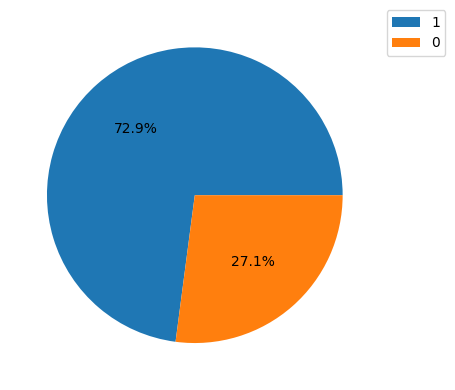

In [11]:
ax = df_train.labels.value_counts().plot(kind="pie", autopct='%1.1f%%', legend=True, ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

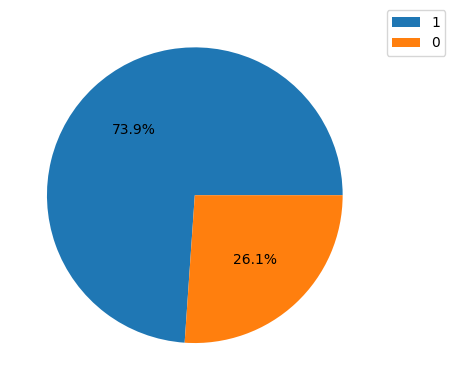

In [12]:
ax = df_valid.labels.value_counts().plot(kind="pie", autopct='%1.1f%%', legend=True, ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

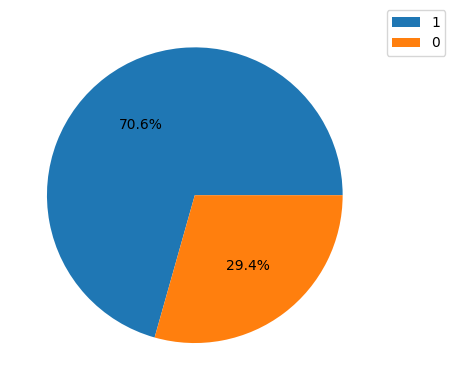

In [13]:
ax = df_test.labels.value_counts().plot(kind="pie", autopct='%1.1f%%', legend=True, ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

***
We can see above that the 0/1 proportion stays farly the same in each slice of the dataset, with the test dataset containing slightly more 0s than the train and validation datasets.
***